In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
#reading the dataset
df=pd.read_csv('Japan_used_cars_datasets.csv')
print(df.shape)
df.head()

(2318, 11)


,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [8]:
df.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [11]:
df.describe()

,id,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785
std,674.460724,288.673112,3.698863,52512.478883,549.585170
min,0.000000,80.000000,1979.000000,2000.000000,9.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000


In [12]:
df.dtypes

id                  int64
price               int64
mark               object
model              object
year                int64
mileage             int64
engine_capacity     int64
transmission       object
drive              object
hand_drive         object
fuel               object
dtype: object

In [13]:
# finding categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['mark', 'model', 'transmission', 'drive', 'hand_drive', 'fuel']


In [14]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['id', 'price', 'year', 'mileage', 'engine_capacity']


In [15]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['mark', 'model', 'transmission', 'drive', 'hand_drive', 'fuel']


In [18]:
pd.options.display.max_colwidth =None
col_name=[]
num=[]
feat=[]
for i in categorical_columns:
    col_name.append(i)
    num.append(len(df[i].unique()))
    feat.append(df[i].unique())
inf=pd.DataFrame({'FEATURE':col_name,"NUMBER OF UNIQUE FEATURES":num,"UNIQUE FEATURES":feat})
inf

,FEATURE,NUMBER OF UNIQUE FEATURES,UNIQUE FEATURES
0,mark,28,"[nissan, toyota, daihatsu, volkswagen, mazda, honda, subaru, mercedes-benz, kubota, mitsubishi, suzuki, bmw, chrysler, smart, gm, opel, isuzu, land rover, peugeot, hyundai, kia motors, audi, citroen, mitsuoka, volvo, ford, hino, jaguar]"
1,model,258,"[march, lafesta, avensis, mira, passat, bongo van, step wgn, sambar, inspire, mercedes-benz others, note, passo, impreza, kubota others, life, progres, cube cubic, cube, a-class, coltplus, mr wagon, pajero mini, fit, legacy b4, vitz, mark ii blit, insight, move, tanto, terios kid, az-wagon, coo, verisa, swift, delica d2, tiida, sienta, mini, colt, platz, bluebird sylphy, eclipse, bb, moco, clipper truck, esse, ek wagon, polo, x-trail, atenza sport, ad van, pixis space, freed spike, stream, alto, raum, wish, every, demio, jimny, premacy, cr-v, lapin, delica, wagon r, lancer, naked, odyssey, ractis, porte, corolla rumion, tiida latio, voxy, carol, sunny, bongo truck, boon, s-mx, pt cruiser, golf, ad expert, fit hybrid, serena, edix, move custom, impreza anesis, estima, carry truck, solio, mpv, vanette van, accord, tribute, pajero io, noah, vanette truck, delica truck, lancer cargo, atenza wagon, atenza, ...]"
2,transmission,3,"[at, mt, cvt]"
3,drive,3,"[2wd, 4wd, awd]"
4,hand_drive,3,"[rhd, center, lhd]"
5,fuel,5,"[gasoline, diesel, hybrid, lpg, cng]"


In [20]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['id', 'price', 'year', 'mileage', 'engine_capacity']


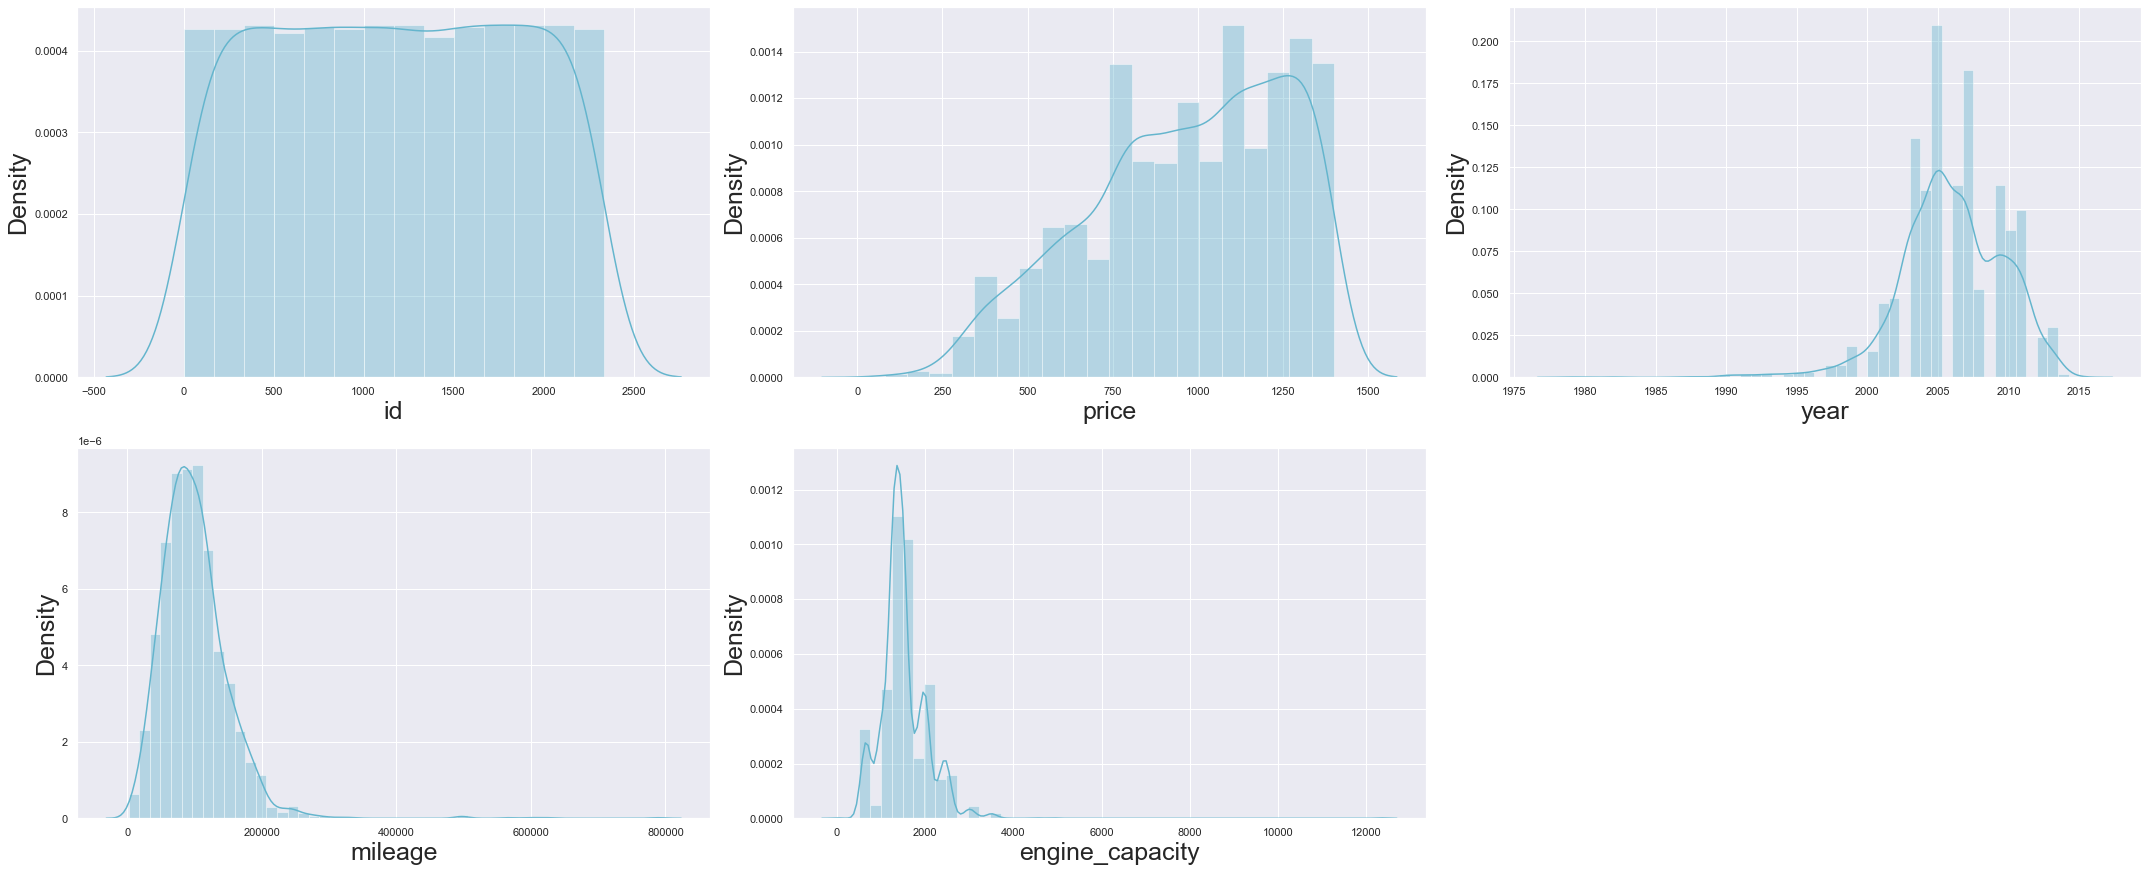

In [21]:
#Distribution plot for all numerical columns
sns.set(style="darkgrid")

plt.figure(figsize = (30,30))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=13:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column],color='c')
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Density',fontsize = 25)
    plotnumber+=1
plt.tight_layout()

In [22]:
print(df.corr()['price'].drop(['price']).sort_values())

year              -0.211092
mileage            0.021581
engine_capacity    0.173748
id                 0.985100
Name: price, dtype: float64


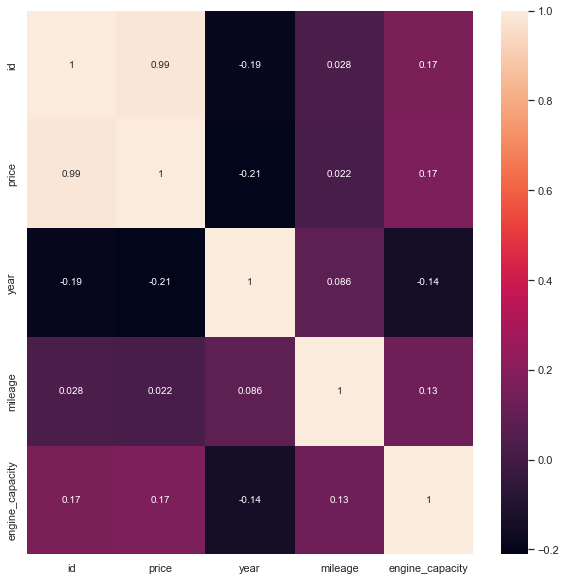

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10})
plt.show()

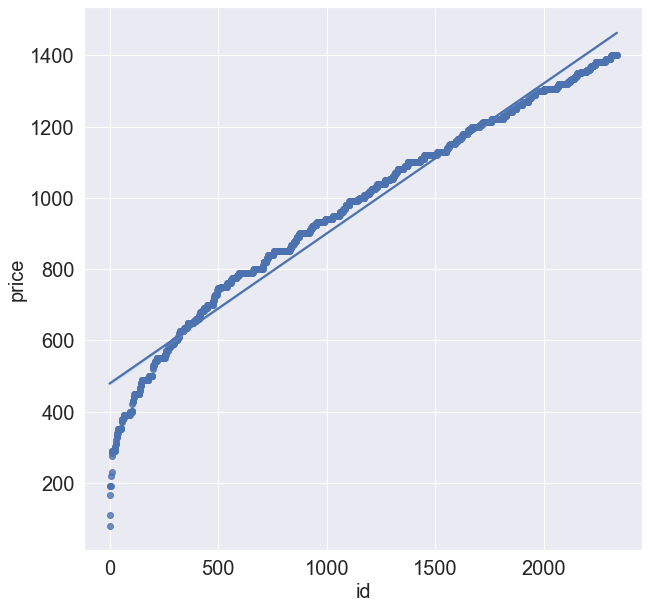

In [24]:
plt.figure(figsize=(10,10))
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('ID',fontsize=20)
plt.ylabel('PRICE',fontsize=20)
sns.regplot(x=df['id'],y=df['price'])
plt.show()

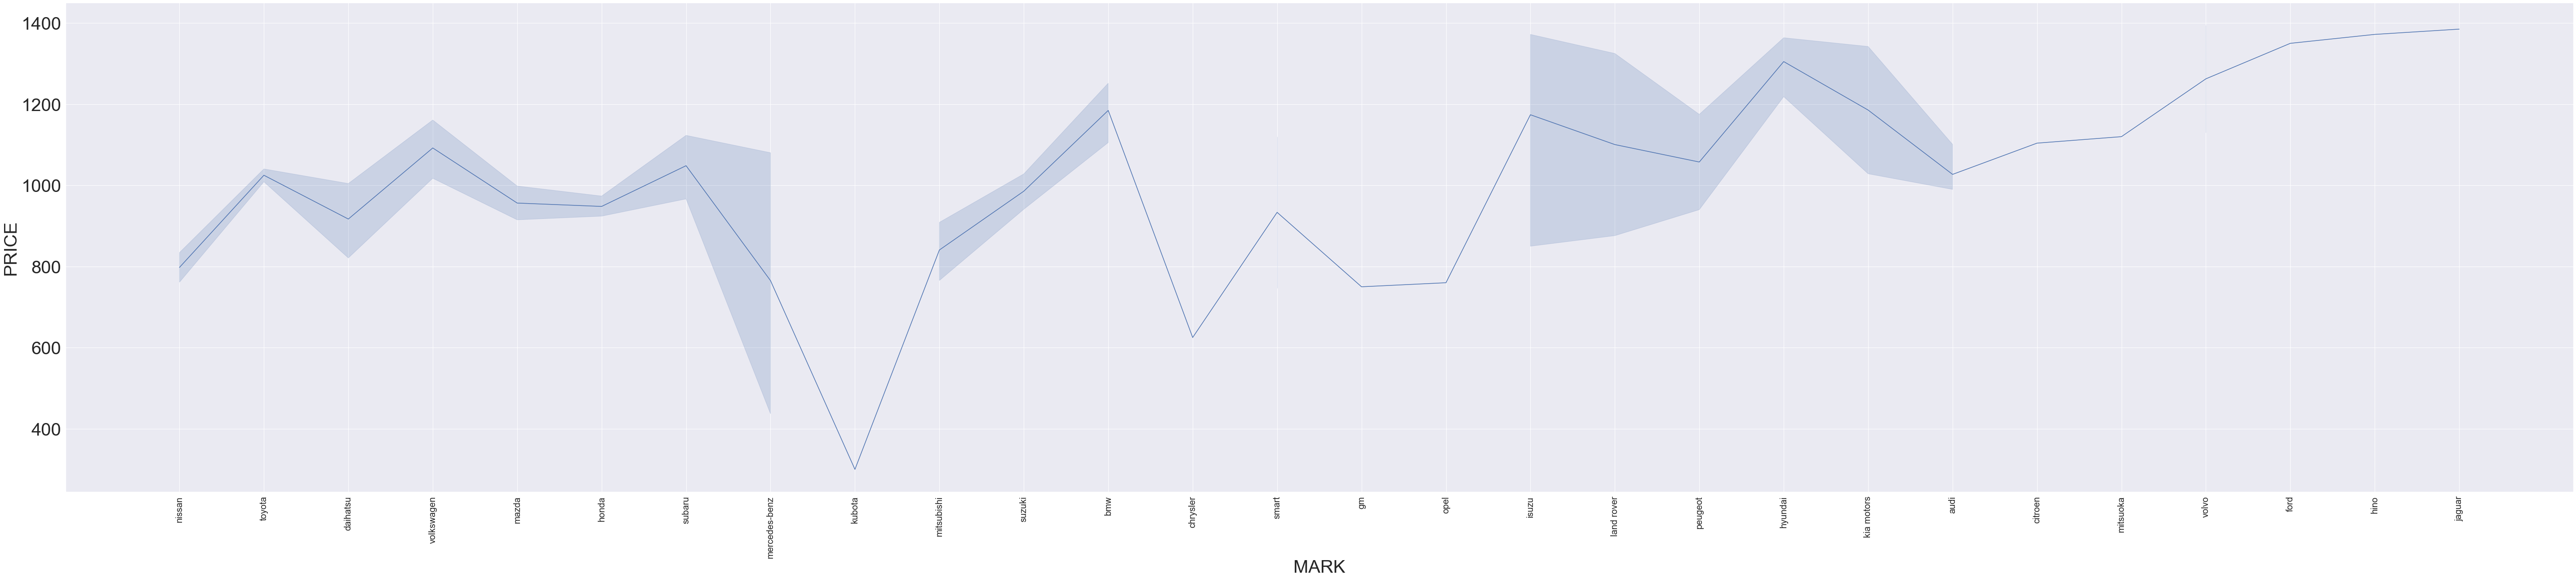

In [25]:
plt.figure(figsize=(100,20))
plt.xticks(size=20,rotation=90)
plt.yticks(size=40)
plt.xlabel('MARK',fontsize=40)
plt.ylabel('PRICE',fontsize=40)
sns.lineplot(x=df['mark'],y=df['price'])
plt.show()


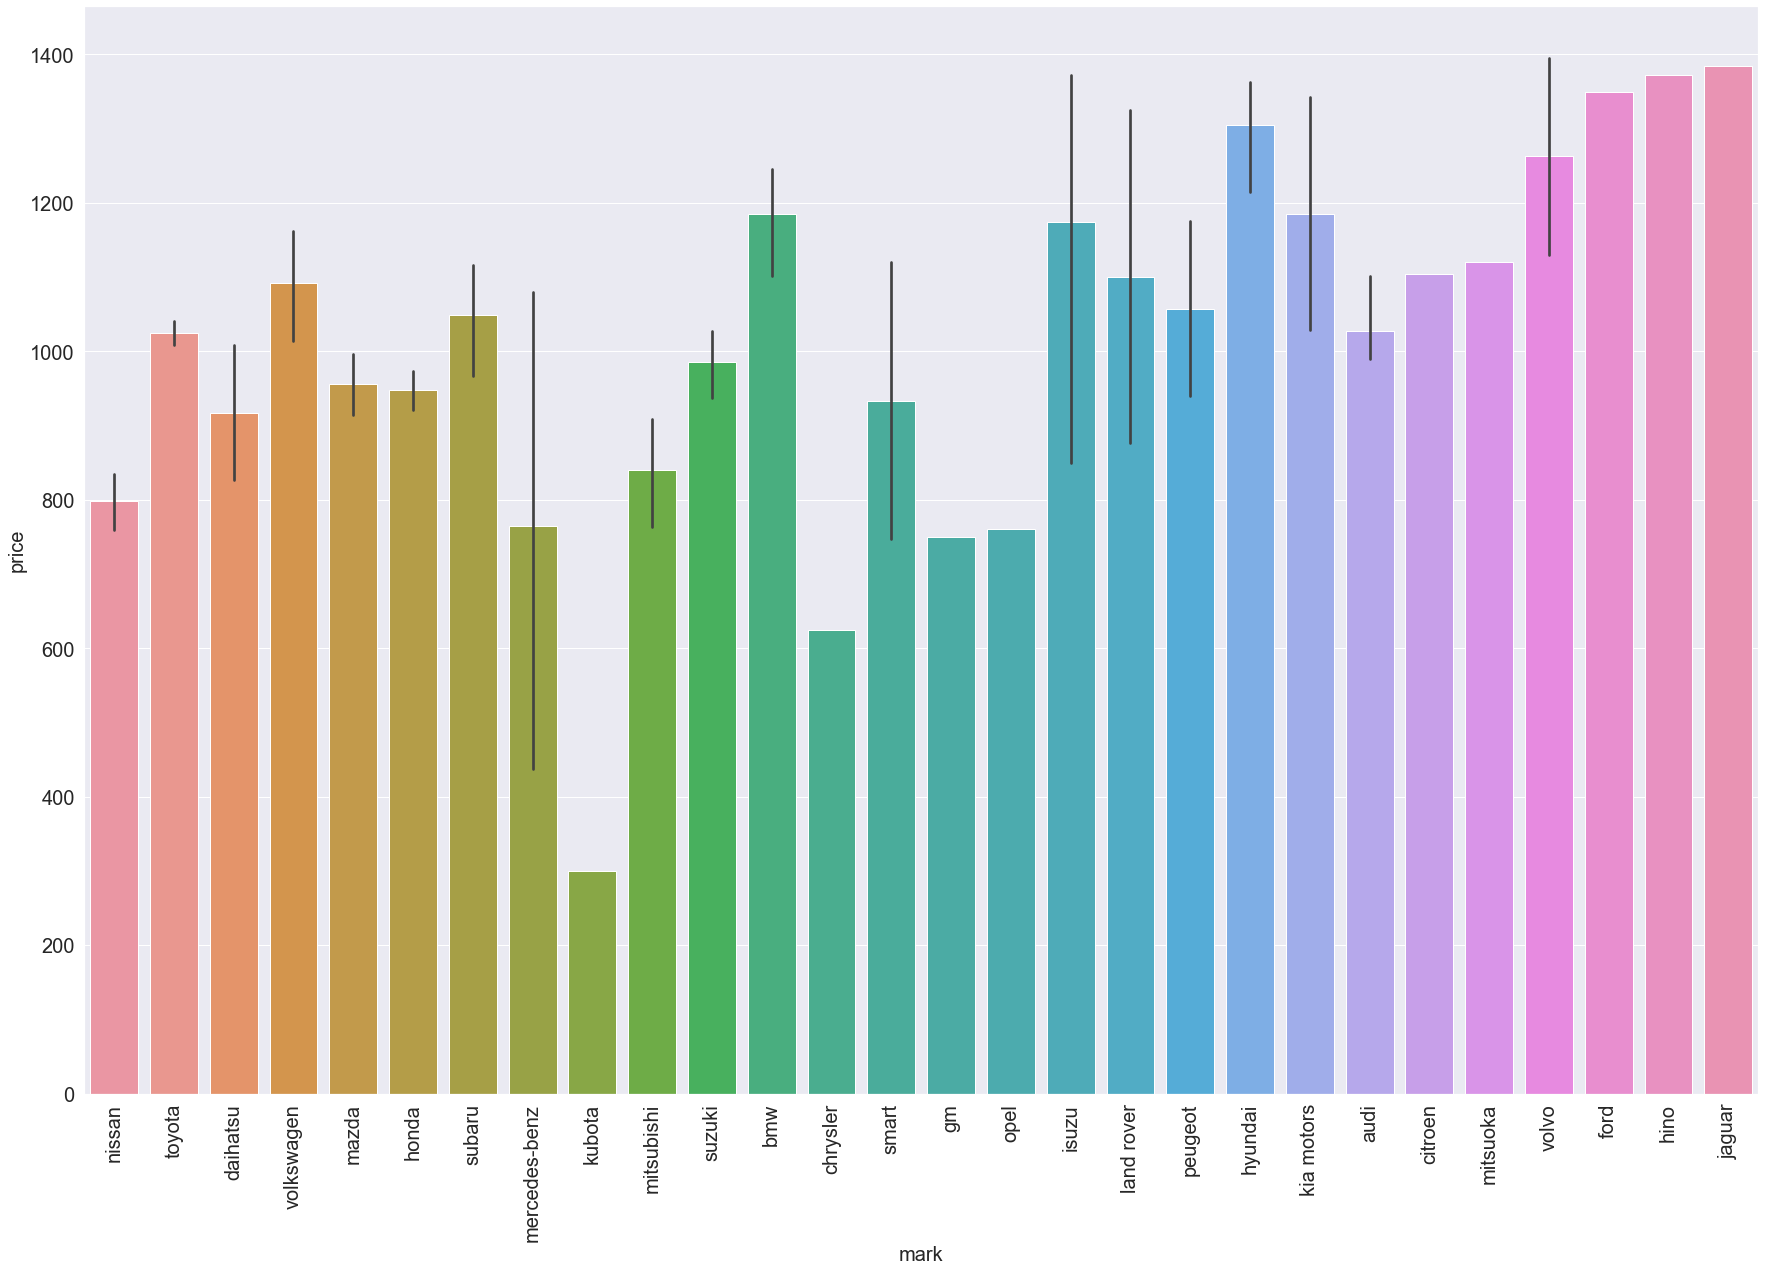

In [26]:
plt.figure(figsize=(30,20))
plt.xticks(size=20,rotation=90)
plt.yticks(size=20)
plt.xlabel('MARK',fontsize=20)
plt.ylabel('PRICE',fontsize=20)
sns.barplot(x=df['mark'],y=df['price'])
plt.show()

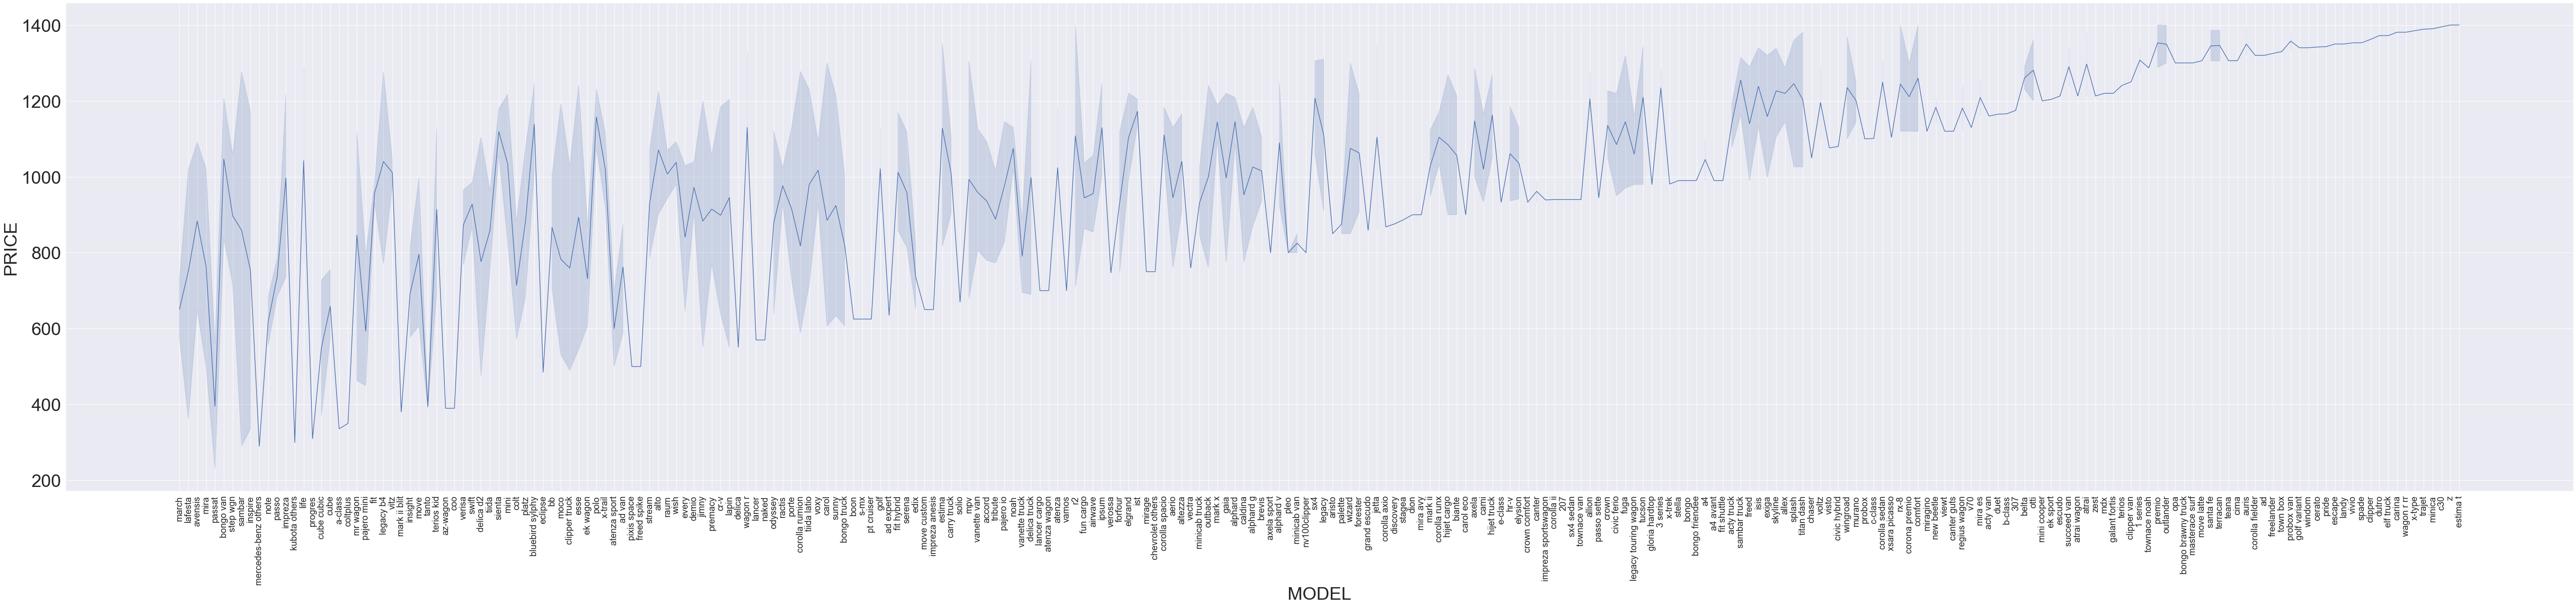

In [27]:
plt.figure(figsize=(100,20))
plt.xticks(size=20,rotation=90)
plt.yticks(size=40)
plt.xlabel('MODEL',fontsize=40)
plt.ylabel('PRICE',fontsize=40)
sns.lineplot(x=df['model'],y=df['price'])
plt.show()

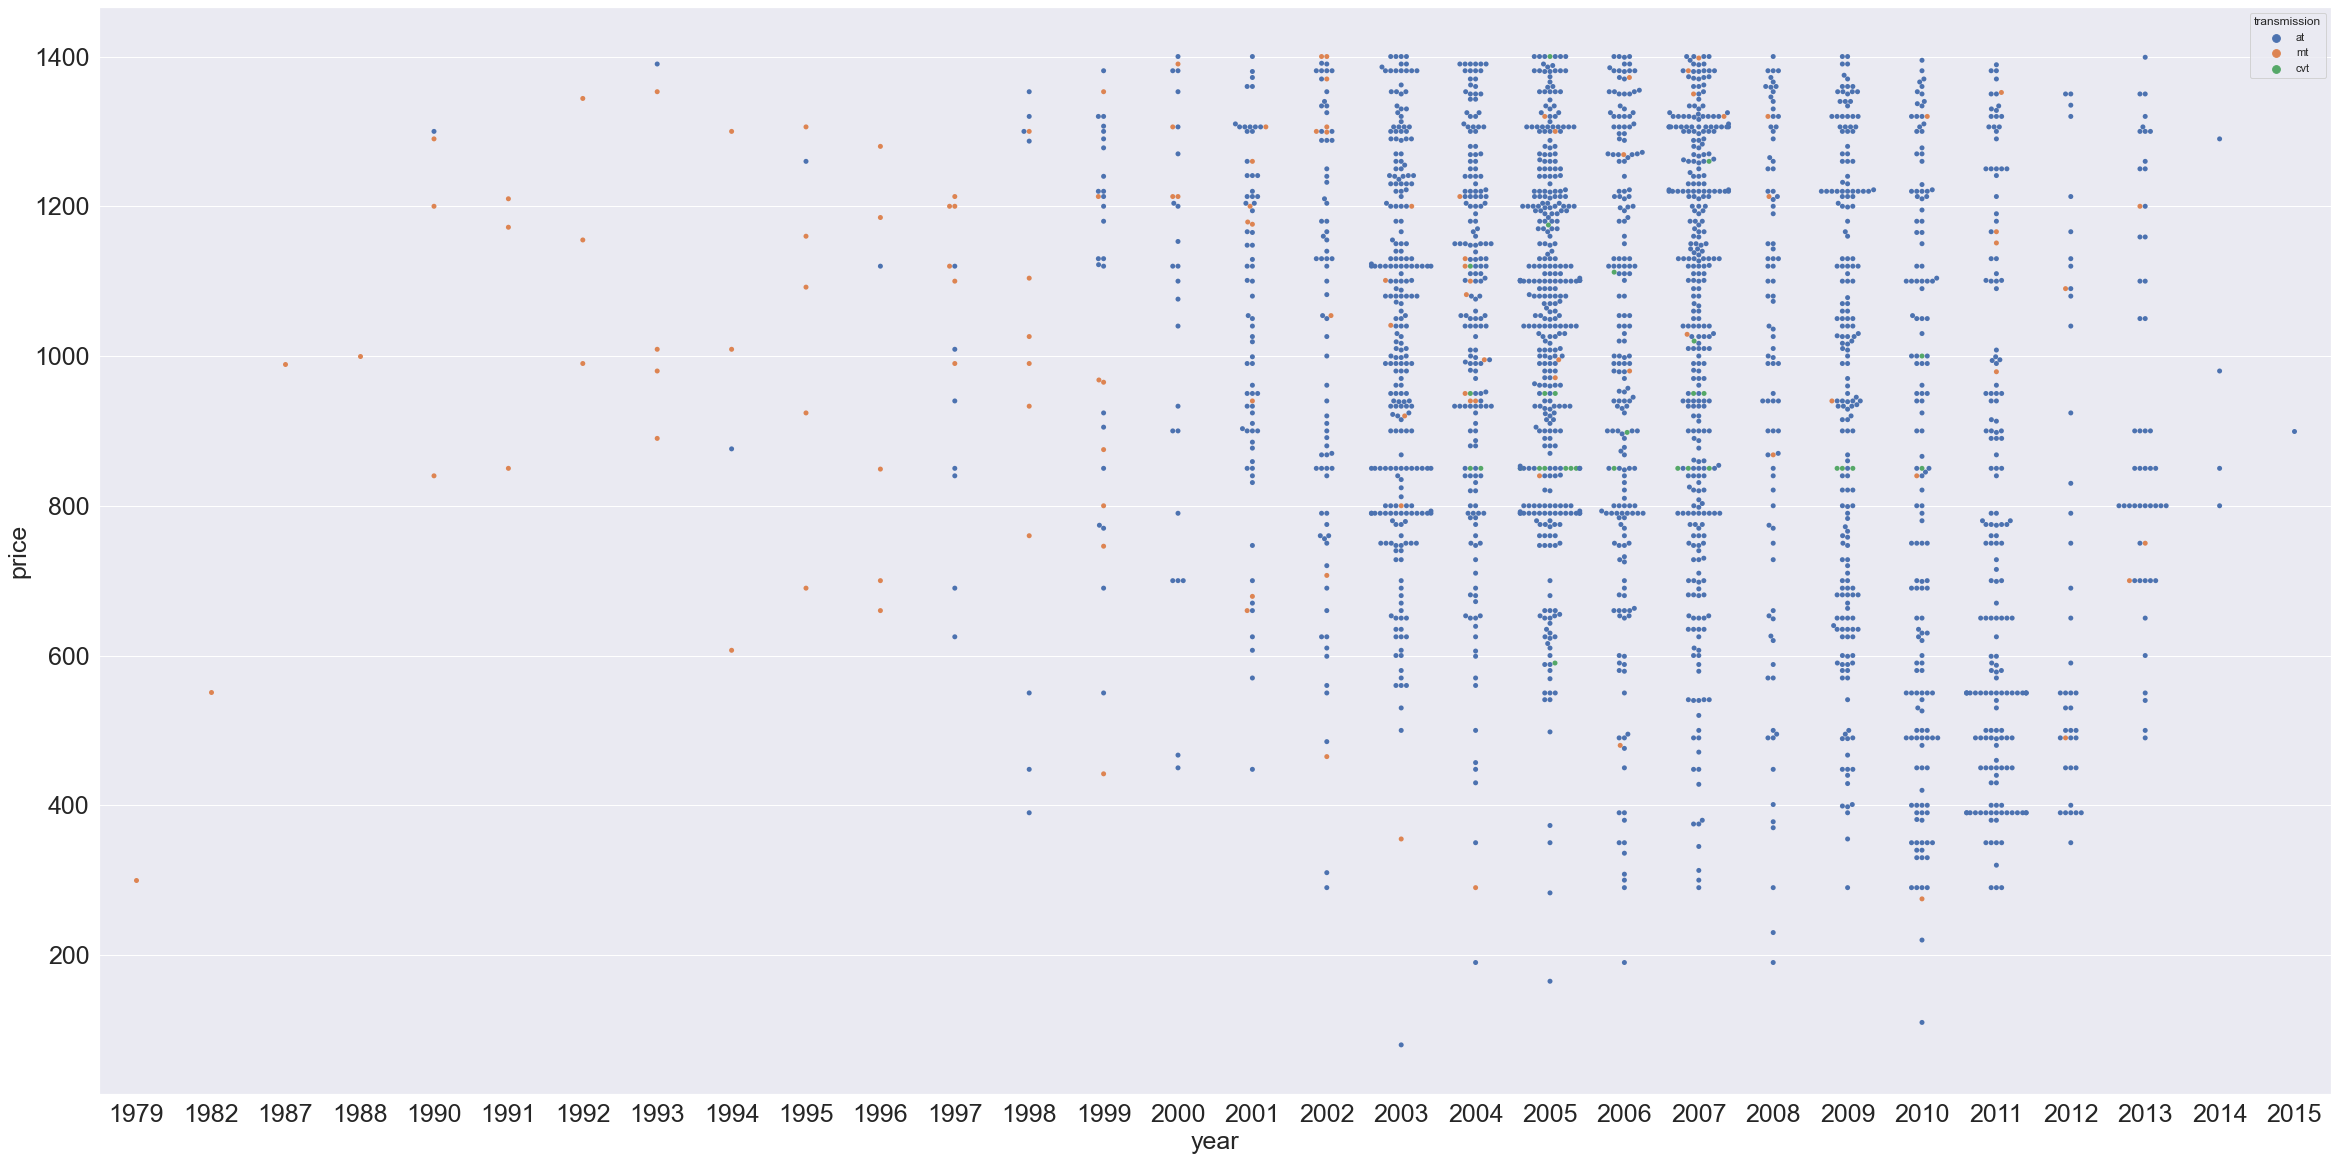

In [28]:
  plt.figure(figsize=(40,20))
plt.xlabel('YEAR',fontsize=25)
plt.ylabel('price',fontsize=25)
plt.xticks(size=25)
plt.yticks(size=25)
sns.swarmplot(x=df['year'],y=df['price'],hue=df['transmission'])
plt.show()

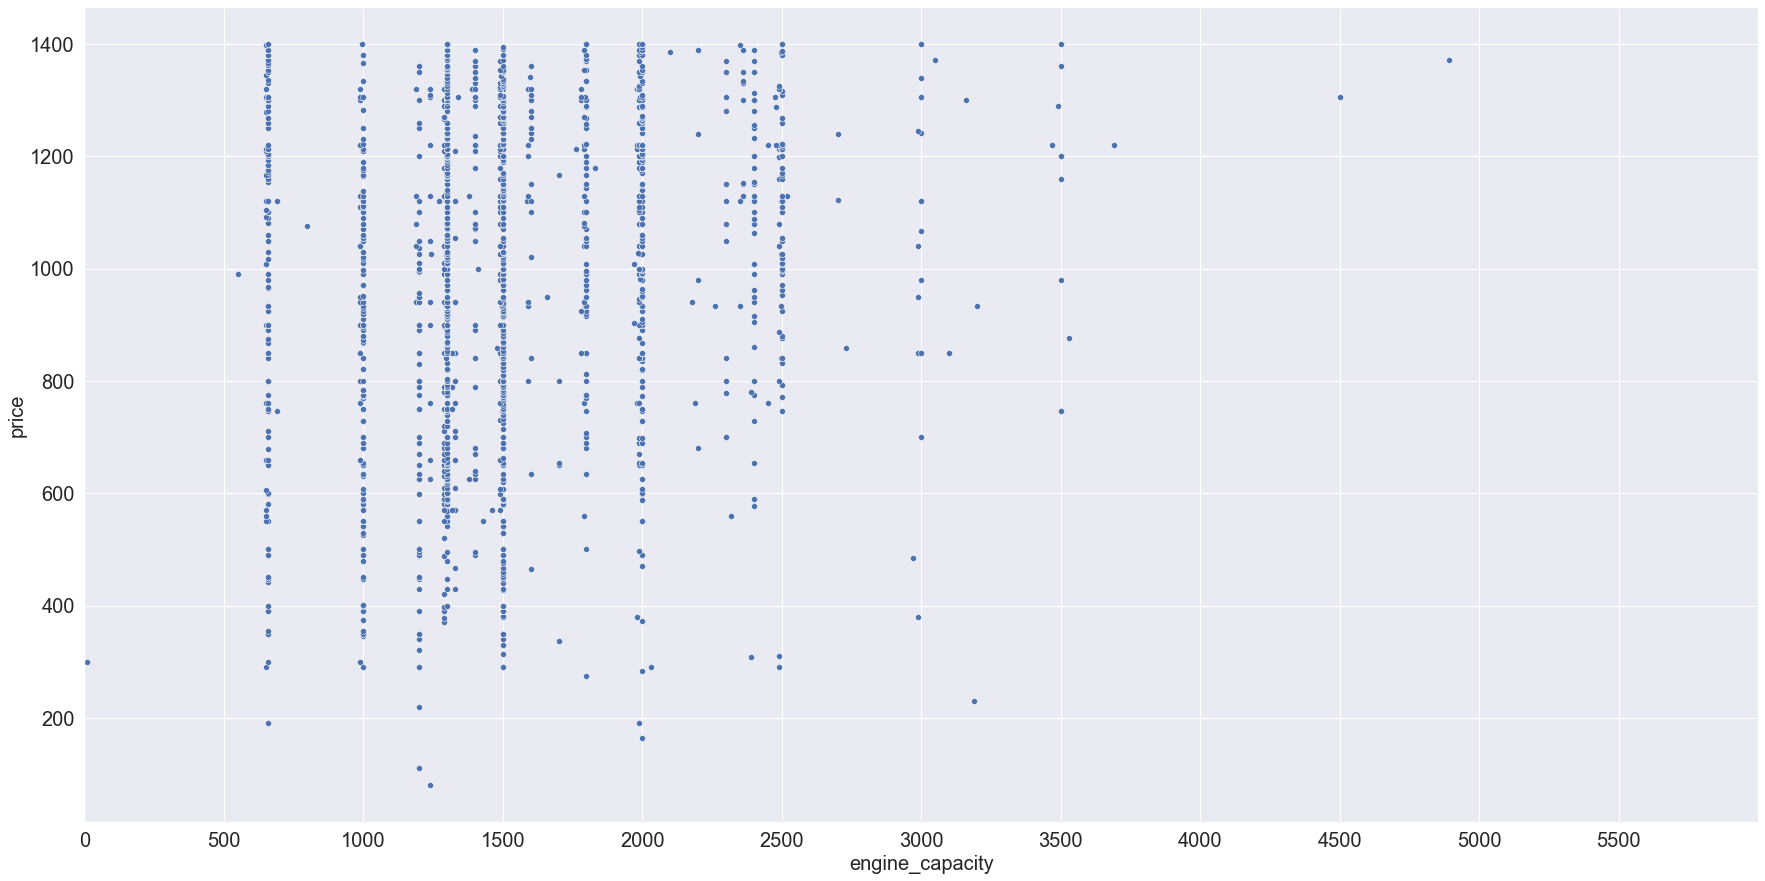

In [29]:
plt.figure(figsize=(30,15))
sns.scatterplot(x=df['engine_capacity'],y=df['price'])
plt.xlabel('engine_capacity',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xticks(np.arange(0,6000,500))
plt.xlim(0,6000)
plt.show()

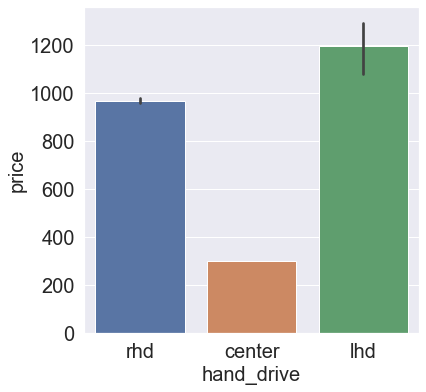

In [30]:
plt.figure(figsize=(6,6))
sns.barplot(x=df['hand_drive'],y=df['price'])
plt.xlabel('hand_drive',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

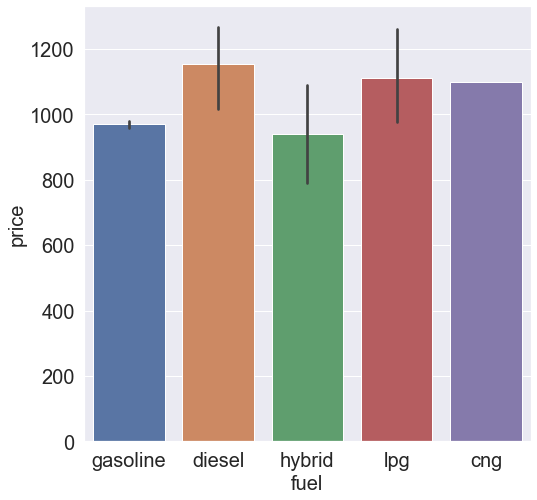

In [33]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['fuel'],y=df['price'])
plt.xlabel('fuel',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

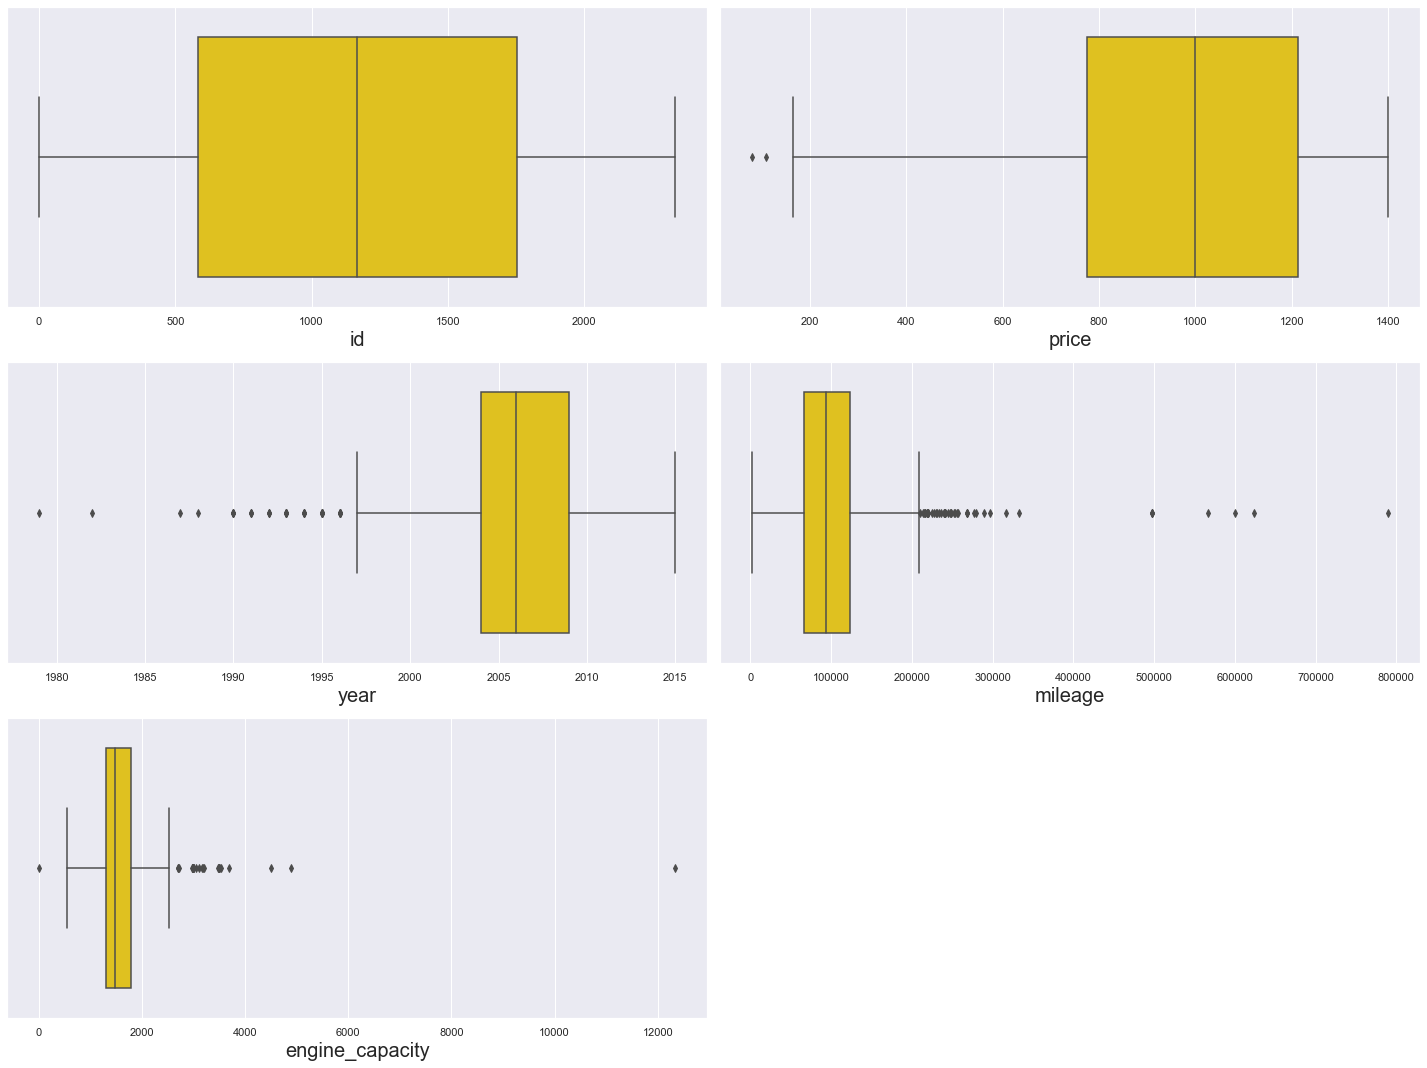

In [34]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

year              -0.845917
price             -0.466780
id                -0.002276
mileage            3.089142
engine_capacity    4.038892
dtype: float64


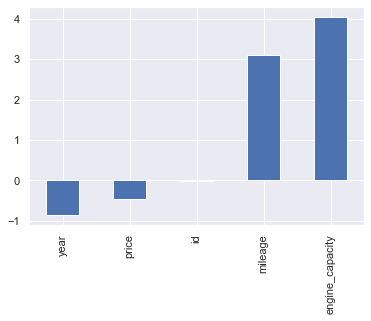

In [35]:
print(df.skew().sort_values())
df.skew().sort_values().plot(kind='bar')
plt.show()

In [36]:
categorical_columns=['mark', 'model', 'transmission', 'drive', 'hand_drive', 'fuel']
numerical_columns=['id', 'price', 'year', 'mileage', 'engine_capacity']

In [38]:
import category_encoders as ce
ben=ce.BinaryEncoder(cols=categorical_columns)

In [39]:
df=ben.fit_transform(df)
df


,id,price,mark_0,mark_1,mark_2,mark_3,mark_4,model_0,model_1,model_2,...,engine_capacity,transmission_0,transmission_1,drive_0,drive_1,hand_drive_0,hand_drive_1,fuel_0,fuel_1,fuel_2
0,0,80,0,0,0,0,1,0,0,0,...,1240,0,1,0,1,0,1,0,0,1
1,1,110,0,0,0,0,1,0,0,0,...,1200,0,1,0,1,0,1,0,0,1
2,2,165,0,0,0,0,1,0,0,0,...,2000,0,1,0,1,0,1,0,0,1
3,3,190,0,0,0,1,0,0,0,0,...,1990,0,1,0,1,0,1,0,0,1
4,4,190,0,0,0,1,1,0,0,0,...,660,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,2331,1400,0,0,0,1,0,0,0,0,...,996,0,1,0,1,0,1,0,0,1
2314,2332,1400,0,0,0,1,0,0,0,1,...,3000,0,1,0,1,0,1,0,0,1
2315,2333,1400,0,0,1,1,1,0,0,1,...,660,1,1,0,1,0,1,0,0,1
2316,2334,1400,0,0,1,1,0,1,0,0,...,660,0,1,1,0,0,1,0,0,1


In [44]:
df_nums=df.copy()
features=df[['id', 'price', 'year', 'mileage', 'engine_capacity']]

In [45]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_nums=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [46]:
df_nums.shape

(2197, 28)

In [47]:
(2318-2197)/2318*100

5.220017256255392

In [48]:
df.head()

,id,price,mark_0,mark_1,mark_2,mark_3,mark_4,model_0,model_1,model_2,...,engine_capacity,transmission_0,transmission_1,drive_0,drive_1,hand_drive_0,hand_drive_1,fuel_0,fuel_1,fuel_2
0,0,80,0,0,0,0,1,0,0,0,...,1240,0,1,0,1,0,1,0,0,1
1,1,110,0,0,0,0,1,0,0,0,...,1200,0,1,0,1,0,1,0,0,1
2,2,165,0,0,0,0,1,0,0,0,...,2000,0,1,0,1,0,1,0,0,1
3,3,190,0,0,0,1,0,0,0,0,...,1990,0,1,0,1,0,1,0,0,1
4,4,190,0,0,0,1,1,0,0,0,...,660,0,1,0,1,0,1,0,0,1


In [49]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
df_new=pd.DataFrame(pt.fit_transform(df_nums),columns=df_nums.columns)
df_new

,id,price,mark_0,mark_1,mark_2,mark_3,mark_4,model_0,model_1,model_2,...,engine_capacity,transmission_0,transmission_1,drive_0,drive_1,hand_drive_0,hand_drive_1,fuel_0,fuel_1,fuel_2
0,-2.164720,-2.273313,-0.105093,-0.329357,-0.647496,-1.771292,1.532673,-0.030185,-0.372736,-0.656002,...,1.177365,-0.231769,0.196903,-0.284958,0.280262,-0.080082,5.684342e-14,-0.042708,-0.085651,0.088307
1,-2.157144,-2.233575,-0.105093,-0.329357,-0.647496,0.564560,-0.652455,-0.030185,-0.372736,-0.656002,...,1.157457,-0.231769,0.196903,-0.284958,0.280262,-0.080082,5.684342e-14,-0.042708,-0.085651,0.088307
2,-2.150105,-2.233575,-0.105093,-0.329357,-0.647496,0.564560,1.532673,-0.030185,-0.372736,-0.656002,...,-2.115731,-0.231769,0.196903,-0.284958,0.280262,-0.080082,5.684342e-14,-0.042708,-0.085651,0.088307
3,-2.143468,-2.233575,-0.105093,-0.329357,-0.647496,0.564560,1.532673,-0.030185,-0.372736,-0.656002,...,-2.115731,-0.231769,0.196903,-0.284958,0.280262,-0.080082,5.684342e-14,-0.042708,-0.085651,0.088307
4,-2.125236,-2.182455,-0.105093,-0.329357,-0.647496,-1.771292,1.532673,-0.030185,-0.372736,-0.656002,...,-0.591712,-0.231769,0.196903,-0.284958,0.280262,-0.080082,5.684342e-14,-0.042708,-0.085651,0.088307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,1.553778,1.632308,-0.105093,-0.329357,-0.647496,0.564560,-0.652455,-0.030185,-0.372736,-0.656002,...,1.177365,-0.231769,0.196903,-0.284958,0.280262,-0.080082,5.684342e-14,-0.042708,-0.085651,0.088307
2193,1.554919,1.632308,-0.105093,-0.329357,1.544412,-1.771292,1.532673,-0.030185,-0.372736,-0.656002,...,-0.346539,-0.231769,0.196903,-0.284958,0.280262,-0.080082,5.684342e-14,-0.042708,-0.085651,0.088307
2194,1.556061,1.632308,-0.105093,-0.329357,-0.647496,0.564560,-0.652455,-0.030185,-0.372736,-0.656002,...,-1.121974,-0.231769,0.196903,-0.284958,0.280262,-0.080082,5.684342e-14,-0.042708,-0.085651,0.088307
2195,1.558344,1.632308,-0.105093,-0.329357,1.544412,0.564560,1.532673,-0.030185,-0.372736,1.524386,...,-2.115731,4.314635,0.196903,-0.284958,0.280262,-0.080082,5.684342e-14,-0.042708,-0.085651,0.088307


In [50]:
x_scaled=df_new.drop(['price'],axis=1)
y=df_new['price']

In [51]:
x_scaled.skew()

id                 -0.282512
mark_0              9.416675
mark_1              2.708708
mark_2              0.897529
mark_3             -1.207557
mark_4              0.880819
model_0            33.120970
model_1             2.311707
model_2             0.868977
model_3             0.325800
model_4            -0.200498
model_5             0.024598
model_6            -0.013665
model_7             0.185718
model_8            -0.563060
year               -0.000962
mileage            -0.027962
engine_capacity     0.007618
transmission_0      4.085655
transmission_1     -4.885083
drive_0             3.226541
drive_1            -3.290072
hand_drive_0       12.415532
hand_drive_1        0.000000
fuel_0             23.388002
fuel_1             11.597563
fuel_2            -11.243473
dtype: float64

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
num_cols=x_scaled[['id','year','mileage','engine_capacity']]
vif['features']=num_cols.columns
vif['scores']=[variance_inflation_factor(num_cols,i) for i  in range (num_cols.shape[1])]
vif

,features,scores
0,id,1.077843
1,year,1.109075
2,mileage,1.017477
3,engine_capacity,1.084183


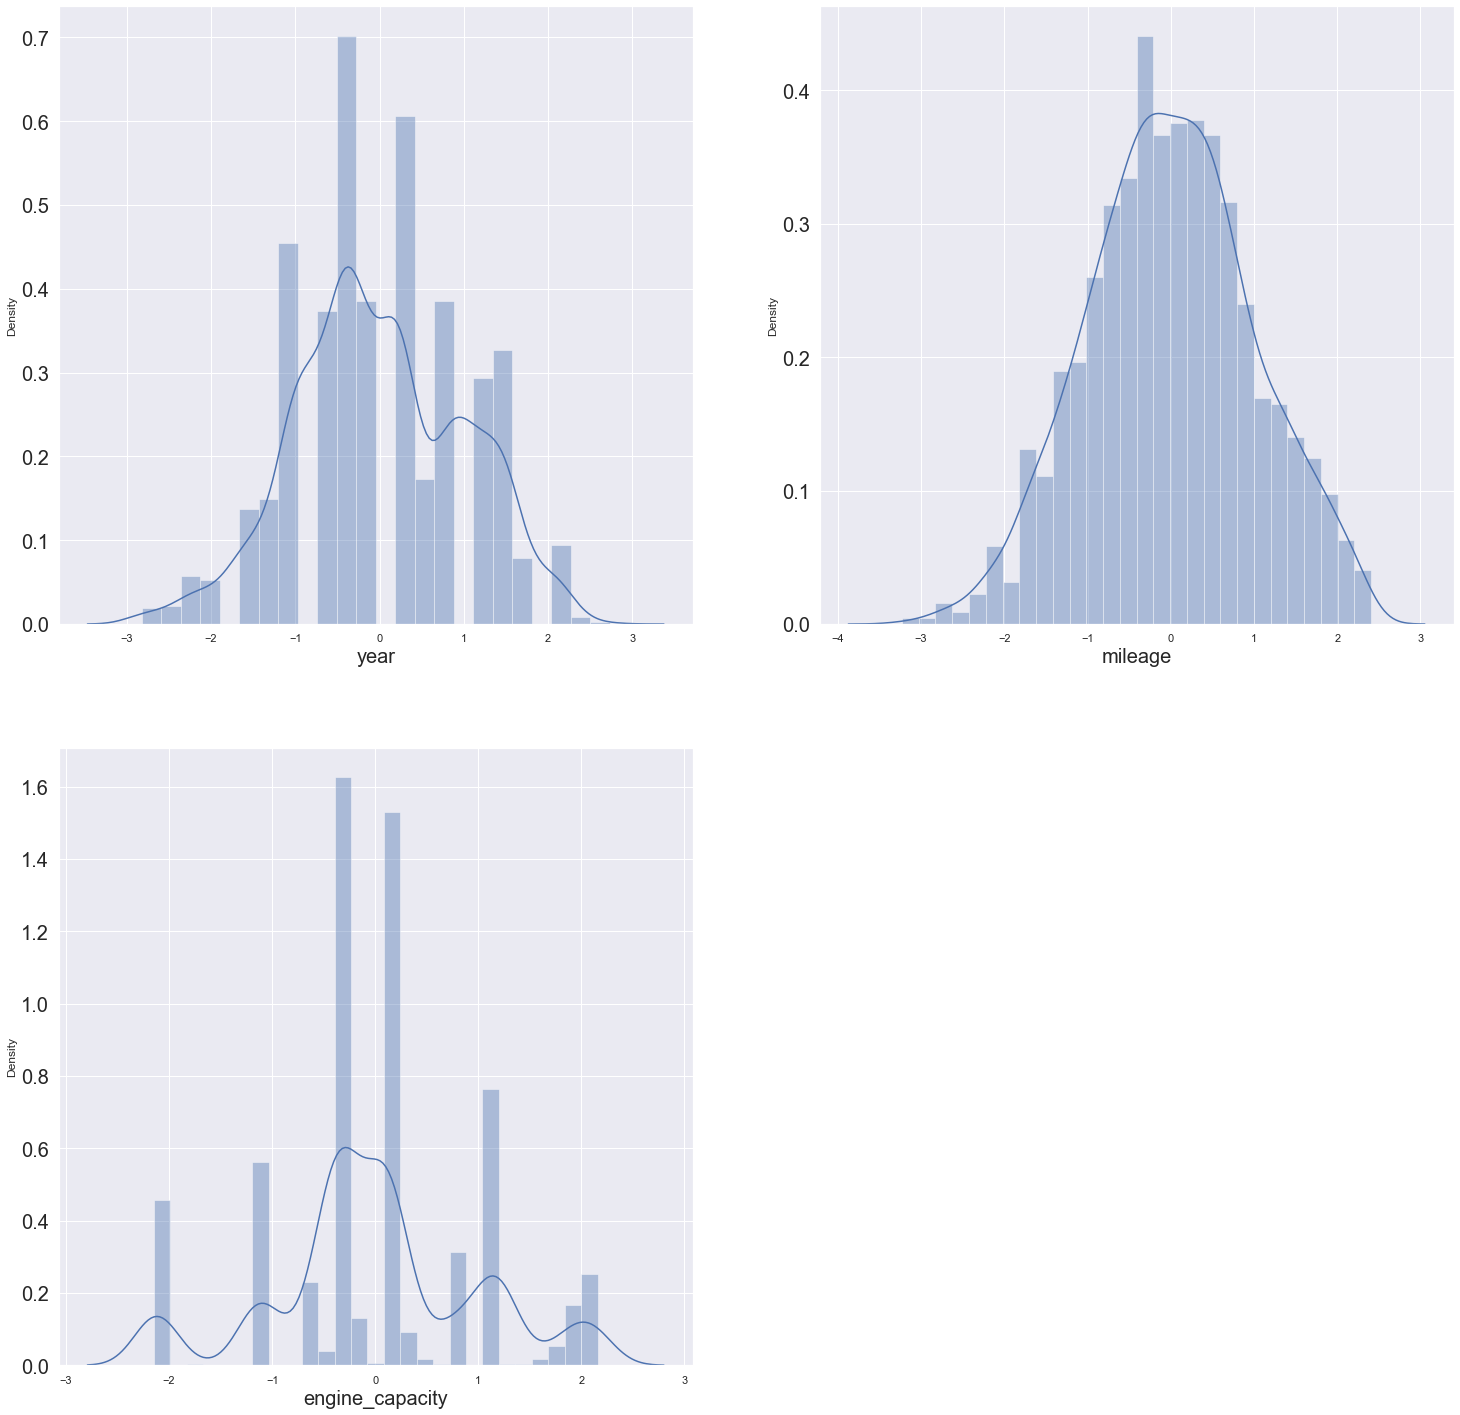

In [53]:
plt.figure(figsize=(25,25))
n=1
for i in x_scaled[['year','mileage','engine_capacity']]:
    if (n<5):
        ax=plt.subplot(2,2,n)
        sns.distplot(x_scaled[i])
        plt.xlabel(i,fontsize=20)
        plt.yticks(size=20)
    n+=1
plt.show()

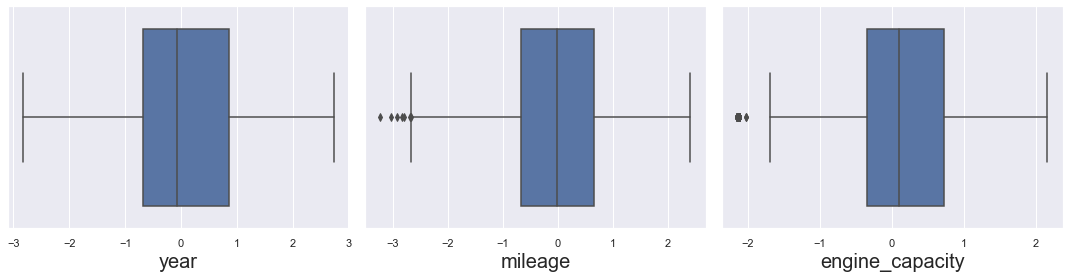

In [55]:
# Checking if the outliers is reduced or not
sns.set(style="darkgrid")

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in x_scaled[['year','mileage','engine_capacity']]:
    if plotnumber<=30:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df_new[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [56]:
x_scaled.shape

(2197, 27)

In [57]:
from sklearn.feature_selection import SelectKBest,f_classif
select=SelectKBest(score_func=f_classif,k=20)
k=20
fit=select.fit(x_scaled,y)

In [58]:
cols=fit.get_support(indices=True)
print(f' top {k} FEATURES INDEX  = {cols}')

 top 20 FEATURES INDEX  = [ 0  1  3  4  5  6  7  8  9 10 11 13 15 16 17 18 19 22 25 26]


In [59]:
features=x_scaled.columns[cols]
list(features)

['id',
 'mark_0',
 'mark_2',
 'mark_3',
 'mark_4',
 'model_0',
 'model_1',
 'model_2',
 'model_3',
 'model_4',
 'model_5',
 'model_7',
 'year',
 'mileage',
 'engine_capacity',
 'transmission_0',
 'transmission_1',
 'hand_drive_0',
 'fuel_1',
 'fuel_2']

In [60]:
print(f' BEST {len(cols)} FEATURES ARE AS FOLLOWS :  \n\n{list(features)} ')

 BEST 20 FEATURES ARE AS FOLLOWS :  

['id', 'mark_0', 'mark_2', 'mark_3', 'mark_4', 'model_0', 'model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_7', 'year', 'mileage', 'engine_capacity', 'transmission_0', 'transmission_1', 'hand_drive_0', 'fuel_1', 'fuel_2'] 


In [62]:
features_scores=pd.DataFrame()

features_scores['FEATURES']=x_scaled.columns
features_scores['SCORES']=fit.scores_

In [63]:
features_scores.sort_values(by='SCORES',ascending=False,inplace=True)
features_scores[:21]

,FEATURES,SCORES
0,id,34364.938214
22,hand_drive_0,7.936763
1,mark_0,3.850728
25,fuel_1,3.715448
26,fuel_2,3.326245
6,model_0,2.080297
19,transmission_1,2.060629
3,mark_2,2.045690
15,year,1.994485
18,transmission_0,1.941183


In [64]:
x_scaled=x_scaled[features]
x_scaled.head()

,id,mark_0,mark_2,mark_3,mark_4,model_0,model_1,model_2,model_3,model_4,model_5,model_7,year,mileage,engine_capacity,transmission_0,transmission_1,hand_drive_0,fuel_1,fuel_2
0,-2.164720,-0.105093,-0.647496,-1.771292,1.532673,-0.030185,-0.372736,-0.656002,-0.850375,-1.105186,-0.987785,1.097092,-0.380263,-1.224634,1.177365,-0.231769,0.196903,-0.080082,-0.085651,0.088307
1,-2.157144,-0.105093,-0.647496,0.564560,-0.652455,-0.030185,-0.372736,-0.656002,-0.850375,-1.105186,-0.987785,1.097092,0.546553,0.870831,1.157457,-0.231769,0.196903,-0.080082,-0.085651,0.088307
2,-2.150105,-0.105093,-0.647496,0.564560,1.532673,-0.030185,-0.372736,-0.656002,-0.850375,-1.105186,-0.987785,-0.911501,-0.071975,-0.682013,-2.115731,-0.231769,0.196903,-0.080082,-0.085651,0.088307
3,-2.143468,-0.105093,-0.647496,0.564560,1.532673,-0.030185,-0.372736,-0.656002,-0.850375,-1.105186,-0.987785,-0.911501,-0.687903,-0.281349,-2.115731,-0.231769,0.196903,-0.080082,-0.085651,0.088307
4,-2.125236,-0.105093,-0.647496,-1.771292,1.532673,-0.030185,-0.372736,-0.656002,-0.850375,-1.105186,-0.987785,-0.911501,1.167687,0.569888,-0.591712,-0.231769,0.196903,-0.080082,-0.085651,0.088307


In [65]:
x_scaled.shape

(2197, 20)

In [66]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [68]:
for i in range (0,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr_train_pred=lr.predict(x_train)
    lr_test_pred=lr.predict(x_test)
    lr_train_accuracy=r2_score(y_train,lr_train_pred)
    lr_test_accuracy=r2_score(y_test,lr_test_pred)
    if(round(lr_train_accuracy*100,1)==round(lr_test_accuracy*100,1)):
        print('\n\nAT RANDOM STATE--',i)
        print(f'\n\nTRAINING ACCURACY IS -  {round((lr_train_accuracy)*100,2)}--AND TESTING ACCURACY IS {round((lr_test_accuracy)*100,2)}')
        



AT RANDOM STATE-- 0


TRAINING ACCURACY IS -  99.81--AND TESTING ACCURACY IS 99.81


AT RANDOM STATE-- 1


TRAINING ACCURACY IS -  99.81--AND TESTING ACCURACY IS 99.8


AT RANDOM STATE-- 2


TRAINING ACCURACY IS -  99.81--AND TESTING ACCURACY IS 99.8


AT RANDOM STATE-- 3


TRAINING ACCURACY IS -  99.81--AND TESTING ACCURACY IS 99.8


AT RANDOM STATE-- 4


TRAINING ACCURACY IS -  99.8--AND TESTING ACCURACY IS 99.82


AT RANDOM STATE-- 5


TRAINING ACCURACY IS -  99.81--AND TESTING ACCURACY IS 99.79


AT RANDOM STATE-- 6


TRAINING ACCURACY IS -  99.81--AND TESTING ACCURACY IS 99.79


AT RANDOM STATE-- 7


TRAINING ACCURACY IS -  99.81--AND TESTING ACCURACY IS 99.81


AT RANDOM STATE-- 8


TRAINING ACCURACY IS -  99.81--AND TESTING ACCURACY IS 99.81


AT RANDOM STATE-- 9


TRAINING ACCURACY IS -  99.81--AND TESTING ACCURACY IS 99.8


AT RANDOM STATE-- 10


TRAINING ACCURACY IS -  99.8--AND TESTING ACCURACY IS 99.81


AT RANDOM STATE-- 11


TRAINING ACCURACY IS -  99.81--AND TESTING AC

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=34)

In [70]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cross_val=cross_val_score(lr,x_scaled,y,cv=i).mean()
    print(f"\n\nCROSS VAL IS AT CV = {i} is {round(cross_val*100,2)}")



CROSS VAL IS AT CV = 2 is 92.96


CROSS VAL IS AT CV = 3 is 90.27


CROSS VAL IS AT CV = 4 is 90.29


CROSS VAL IS AT CV = 5 is 88.07


CROSS VAL IS AT CV = 6 is 85.1


CROSS VAL IS AT CV = 7 is 84.37


CROSS VAL IS AT CV = 8 is 82.62


CROSS VAL IS AT CV = 9 is 77.71


In [71]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def score(mod,x_train,x_test,y_train,y_test,train):
    n=x_train.shape[0]
    p=6
    if (train==True):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_train)
        accuracy=r2_score(y_train,y_pred)
        mse=mean_squared_error(y_train,y_pred)
        mae=mean_absolute_error(y_train,y_pred)
        rsme=np.sqrt(mse)
        print(f"\n\nTraining SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\nmean sqaured error is --',mse)
        print('\nmean sqaured error is --',mse)
        print('\nroot mean sqaured error is --',rsme)
        print('\nmean aboslute error is --',mae)
        print('\ndifference between rmse and mae is ',rsme-mae)
    elif(train==False):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        accuracy=r2_score(y_test,y_pred)
        cross_val=cross_val_score(mod,x_scaled,y,cv=3).mean()
        ad_r=1-(1-accuracy)*(n-1)/(n-p-1)
        mse=mean_squared_error(y_test,y_pred)
        mae=mean_absolute_error(y_test,y_pred)
        rsme=np.sqrt(mse)
        print(f"\n\nTesting SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCROSS VAL SCORE IS --',round(cross_val*100,2))
        print(f"\nadjusted r2_score for {mod} is {round(ad_r*100,2)}")
        print('\nmean sqaured error is --',mse)
        print('\nmean aboslute error is -',mae)
        print('\nroot mean sqaured error is --',rsme)
        print('\nmean aboslute error is --',mae)
        print('\ndifference between rmse and mae is ',rsme-mae)

In [72]:
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LinearRegression() is 99.81

mean sqaured error is -- 0.0019896169383989085

mean sqaured error is -- 0.0019896169383989085

root mean sqaured error is -- 0.044605122333639086

mean aboslute error is -- 0.037221624366466706

difference between rmse and mae is  0.00738349796717238


Testing SCORE FOR THE LinearRegression() is 99.81


CROSS VAL SCORE IS -- 90.27

adjusted r2_score for LinearRegression() is 99.81

mean sqaured error is -- 0.0017549922981063245

mean aboslute error is - 0.03517557933460611

root mean sqaured error is -- 0.04189262820719565

mean aboslute error is -- 0.03517557933460611

difference between rmse and mae is  0.006717048872589539


In [74]:
from sklearn.linear_model import Lasso,LassoCV


In [75]:
lasscv=LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [76]:
alpha=lasscv.alpha_


In [77]:
lass_reg=Lasso(alpha)
lass_reg.fit(x_train,y_train)

Lasso(alpha=2.4965998894500727e-05)

In [78]:
print(f'TRAINING R2_SCORES USING LASSO IS {round(lass_reg.score(x_train,y_train)*100,2)}')

TRAINING R2_SCORES USING LASSO IS 99.81


In [79]:
print(f'TESTING R2_SCORES USING LASSO IS {round(lass_reg.score(x_test,y_test)*100,2)}')

TESTING R2_SCORES USING LASSO IS 99.81


### MODEL 2)-DECISION TREE

In [80]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [81]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor() is 100.0

mean sqaured error is -- 4.0629715598362593e-32

mean sqaured error is -- 4.0629715598362593e-32

root mean sqaured error is -- 2.0156814132784623e-16

mean aboslute error is -- 8.657291809830824e-17

difference between rmse and mae is  1.14995223229538e-16


Testing SCORE FOR THE DecisionTreeRegressor() is 100.0


CROSS VAL SCORE IS -- -187.06

adjusted r2_score for DecisionTreeRegressor() is 100.0

mean sqaured error is -- 3.012427072234439e-05

mean aboslute error is - 0.0019342627777231098

root mean sqaured error is -- 0.0054885581642490034

mean aboslute error is -- 0.0019342627777231098

difference between rmse and mae is  0.0035542953865258936


In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
dt=DecisionTreeRegressor()
ppo={'criterion':["squared_error", "friedman_mse", "absolute_error"],
      'splitter':["best", "random"],
      'min_samples_split':np.arange(2,5),
    'min_samples_leaf':np.arange(3,6),
    'random_state':[32,34,38,42,46],
    'max_depth':np.arange(28,32)}

In [84]:
lgt=GridSearchCV(dt,param_grid=ppo)

In [85]:
lgt.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': array([28, 29, 30, 31]),
                         'min_samples_leaf': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4]),
                         'random_state': [32, 34, 38, 42, 46],
                         'splitter': ['best', 'random']})

In [86]:
lgt.best_params_

{'criterion': 'squared_error',
 'max_depth': 28,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'random_state': 42,
 'splitter': 'best'}

In [87]:
dt=lgt.best_estimator_
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=28, min_samples_leaf=3, random_state=42)

In [88]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor(max_depth=28, min_samples_leaf=3, random_state=42) is 100.0

mean sqaured error is -- 1.0333517685611099e-05

mean sqaured error is -- 1.0333517685611099e-05

root mean sqaured error is -- 0.003214578928197455

mean aboslute error is -- 0.0010681762765393905

difference between rmse and mae is  0.0021464026516580647


Testing SCORE FOR THE DecisionTreeRegressor(max_depth=28, min_samples_leaf=3, random_state=42) is 100.0


CROSS VAL SCORE IS -- -189.79

adjusted r2_score for DecisionTreeRegressor(max_depth=28, min_samples_leaf=3, random_state=42) is 100.0

mean sqaured error is -- 3.9994651184088284e-05

mean aboslute error is - 0.0025560033715516903

root mean sqaured error is -- 0.006324132445172878

mean aboslute error is -- 0.0025560033715516903

difference between rmse and mae is  0.003768129073621188


In [ ]:
MODEL 3) KNN

In [89]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

In [90]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [91]:
score(knr,x_train,x_test,y_train,y_test,train=True)
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor() is 89.79

mean sqaured error is -- 0.1049859146643431

mean sqaured error is -- 0.1049859146643431

root mean sqaured error is -- 0.32401530004668466

mean aboslute error is -- 0.22947656274550202

difference between rmse and mae is  0.09453873730118265


Testing SCORE FOR THE KNeighborsRegressor() is 83.12


CROSS VAL SCORE IS -- -617.51

adjusted r2_score for KNeighborsRegressor() is 83.06

mean sqaured error is -- 0.1542080057286002

mean aboslute error is - 0.27150768201868697

root mean sqaured error is -- 0.3926932718147845

mean aboslute error is -- 0.27150768201868697

difference between rmse and mae is  0.1211855897960975


In [92]:
knr.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [94]:
pl={"n_neighbors":np.arange(3,6),
   "weights":['uniform', 'distance'],
   "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':np.arange(25,35)}

In [95]:
kgs=GridSearchCV(knr,param_grid=pl)

In [96]:
kgs.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
                         'n_neighbors': array([3, 4, 5]),
                         'weights': ['uniform', 'distance']})

In [97]:
kgs.best_params_

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 4, 'weights': 'distance'}

In [98]:
knr=kgs.best_estimator_

In [99]:
knr.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=25, n_neighbors=4, weights='distance')

In [100]:
score(knr,x_train,x_test,y_train,y_test,train=True)
print('\n\n-----------------------\n\n')
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor(leaf_size=25, n_neighbors=4, weights='distance') is 100.0

mean sqaured error is -- 2.3081125377435907e-15

mean sqaured error is -- 2.3081125377435907e-15

root mean sqaured error is -- 4.8042819835471676e-08

mean aboslute error is -- 2.0621465779773316e-08

difference between rmse and mae is  2.742135405569836e-08


-----------------------




Testing SCORE FOR THE KNeighborsRegressor(leaf_size=25, n_neighbors=4, weights='distance') is 85.86


CROSS VAL SCORE IS -- -577.51

adjusted r2_score for KNeighborsRegressor(leaf_size=25, n_neighbors=4, weights='distance') is 85.81

mean sqaured error is -- 0.1291535757868809

mean aboslute error is - 0.24183347920386924

root mean sqaured error is -- 0.35937943150225066

mean aboslute error is -- 0.24183347920386924

difference between rmse and mae is  0.11754595229838141


AGAIN TUNING THE PARAMETERS------------------------

In [101]:
knr=KNeighborsRegressor()

In [102]:
pu={"n_neighbors":np.arange(2,5),
   "weights":['uniform', 'distance'],
   "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':np.arange(40,50)}

In [103]:
kgsv=GridSearchCV(knr,param_grid=pu)

In [104]:
kgsv.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'n_neighbors': array([2, 3, 4]),
                         'weights': ['uniform', 'distance']})

In [105]:
kgsv.best_params_

{'algorithm': 'auto', 'leaf_size': 40, 'n_neighbors': 4, 'weights': 'distance'}

In [106]:
knr=kgsv.best_estimator_

In [107]:
knr.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=40, n_neighbors=4, weights='distance')

In [108]:
score(knr,x_train,x_test,y_train,y_test,train=True)
print('\n\n-----------------------\n\n')
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor(leaf_size=40, n_neighbors=4, weights='distance') is 100.0

mean sqaured error is -- 2.3081125377435907e-15

mean sqaured error is -- 2.3081125377435907e-15

root mean sqaured error is -- 4.8042819835471676e-08

mean aboslute error is -- 2.0621465779773316e-08

difference between rmse and mae is  2.742135405569836e-08


-----------------------




Testing SCORE FOR THE KNeighborsRegressor(leaf_size=40, n_neighbors=4, weights='distance') is 85.86


CROSS VAL SCORE IS -- -577.51

adjusted r2_score for KNeighborsRegressor(leaf_size=40, n_neighbors=4, weights='distance') is 85.81

mean sqaured error is -- 0.1291535757868809

mean aboslute error is - 0.24183347920386924

root mean sqaured error is -- 0.35937943150225066

mean aboslute error is -- 0.24183347920386924

difference between rmse and mae is  0.11754595229838141


## MODEL 4)-RANDOM FOREST REGRESSOR

In [109]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [110]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [111]:
score(rfr,x_train,x_test,y_train,y_test,train=True)
score(rfr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestRegressor() is 100.0

mean sqaured error is -- 4.152728006232281e-06

mean sqaured error is -- 4.152728006232281e-06

root mean sqaured error is -- 0.002037824331543885

mean aboslute error is -- 0.0007872434926212501

difference between rmse and mae is  0.0012505808389226348


Testing SCORE FOR THE RandomForestRegressor() is 100.0


CROSS VAL SCORE IS -- -187.84

adjusted r2_score for RandomForestRegressor() is 100.0

mean sqaured error is -- 1.745119198008833e-05

mean aboslute error is - 0.0018611474608785361

root mean sqaured error is -- 0.004177462385239194

mean aboslute error is -- 0.0018611474608785361

difference between rmse and mae is  0.0023163149243606573


In [112]:
##HYPERPARAMETER TUNING
rfr=RandomForestRegressor()

In [113]:
par={"n_estimators":[60,72,82],
     "criterion":["squared_error", "absolute_error", "poisson"],
     "max_depth":[25,28,30],
     "min_samples_split":[2,3,5]}

In [114]:
rgs=GridSearchCV(rfr,param_grid=par)
rgs.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [25, 28, 30],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [60, 72, 82]})

In [115]:
rgs.best_params_

{'criterion': 'squared_error',
 'max_depth': 30,
 'min_samples_split': 3,
 'n_estimators': 72}

In [116]:
rfr=rgs.best_estimator_

In [117]:
score(rfr,x_train,x_test,y_train,y_test,train=True)
score(rfr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestRegressor(max_depth=30, min_samples_split=3, n_estimators=72) is 100.0

mean sqaured error is -- 3.7479141483948256e-06

mean sqaured error is -- 3.7479141483948256e-06

root mean sqaured error is -- 0.0019359530336231882

mean aboslute error is -- 0.0007929087818057761

difference between rmse and mae is  0.0011430442518174122


Testing SCORE FOR THE RandomForestRegressor(max_depth=30, min_samples_split=3, n_estimators=72) is 100.0


CROSS VAL SCORE IS -- -188.04

adjusted r2_score for RandomForestRegressor(max_depth=30, min_samples_split=3, n_estimators=72) is 100.0

mean sqaured error is -- 1.706421481292368e-05

mean aboslute error is - 0.001876480956646091

root mean sqaured error is -- 0.004130885475648494

mean aboslute error is -- 0.001876480956646091

difference between rmse and mae is  0.0022544045190024025


### MODEL 5) SVR

In [118]:
from sklearn.svm import SVR
svr=SVR()

In [119]:
svr.fit(x_train,y_train)

SVR()

In [120]:
score(svr,x_train,x_test,y_train,y_test,train=True)
score(svr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVR() is 99.44

mean sqaured error is -- 0.00578144857100038

mean sqaured error is -- 0.00578144857100038

root mean sqaured error is -- 0.07603583741237009

mean aboslute error is -- 0.06114837404051081

difference between rmse and mae is  0.014887463371859283


Testing SCORE FOR THE SVR() is 97.74


CROSS VAL SCORE IS -- -19.08

adjusted r2_score for SVR() is 97.74

mean sqaured error is -- 0.020602994015964066

mean aboslute error is - 0.08078619410997623

root mean sqaured error is -- 0.14353743071395722

mean aboslute error is -- 0.08078619410997623

difference between rmse and mae is  0.06275123660398099


#### HYPERPARAMETER TUNING

In [121]:
parm={"epsilon":[0.1,0.2,0.3],
      "shrinking":[True,False],
      "gamma":['scale', 'auto']}

In [122]:
sgs=GridSearchCV(svr,param_grid=parm)

In [123]:
sgs.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'epsilon': [0.1, 0.2, 0.3], 'gamma': ['scale', 'auto'],
                         'shrinking': [True, False]})

In [124]:
sgs.best_params_

{'epsilon': 0.1, 'gamma': 'auto', 'shrinking': True}

In [125]:
svr=sgs.best_estimator_
svr.fit(x_train,y_train)

SVR(gamma='auto')

In [126]:
score(svr,x_train,x_test,y_train,y_test,train=True)
score(svr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVR(gamma='auto') is 99.44

mean sqaured error is -- 0.005778146431678213

mean sqaured error is -- 0.005778146431678213

root mean sqaured error is -- 0.0760141199493766

mean aboslute error is -- 0.06112395991392803

difference between rmse and mae is  0.014890160035448567


Testing SCORE FOR THE SVR(gamma='auto') is 97.75


CROSS VAL SCORE IS -- -9.64

adjusted r2_score for SVR(gamma='auto') is 97.74

mean sqaured error is -- 0.020576839116469486

mean aboslute error is - 0.08073658429379978

root mean sqaured error is -- 0.14344629349156948

mean aboslute error is -- 0.08073658429379978

difference between rmse and mae is  0.0627097091977697


### MODEL 6) ADA BOOST REGRESSOR

In [127]:
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor()

In [128]:
adr.fit(x_train,y_train)

AdaBoostRegressor()

In [129]:
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor() is 99.56

mean sqaured error is -- 0.004489293635979762

mean sqaured error is -- 0.004489293635979762

root mean sqaured error is -- 0.06700219127744825

mean aboslute error is -- 0.04784736916875553

difference between rmse and mae is  0.019154822108692716


Testing SCORE FOR THE AdaBoostRegressor() is 99.63


CROSS VAL SCORE IS -- -290.65

adjusted r2_score for AdaBoostRegressor() is 99.63

mean sqaured error is -- 0.0033416736105010224

mean aboslute error is - 0.04484113148171567

root mean sqaured error is -- 0.057807210713725174

mean aboslute error is -- 0.04484113148171567

difference between rmse and mae is  0.012966079232009507


###HYPERPARAMETER TUNING

In [130]:
adr.get_params().keys()

dict_keys(['base_estimator', 'learning_rate', 'loss', 'n_estimators', 'random_state'])

In [131]:
para={
     'n_estimators':[48,52,60,72],
     'learning_rate':[0.001,0.025,0.03],
     'random_state':[32,34,48,40]}

In [133]:
ags=GridSearchCV(adr,param_grid=para)
ags.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.025, 0.03],
                         'n_estimators': [48, 52, 60, 72],
                         'random_state': [32, 34, 48, 40]})

In [134]:
ags.best_params_

{'learning_rate': 0.03, 'n_estimators': 72, 'random_state': 48}

In [135]:
adr=ags.best_estimator_

In [136]:
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor(learning_rate=0.03, n_estimators=72, random_state=48) is 98.53

mean sqaured error is -- 0.015126166004338137

mean sqaured error is -- 0.015126166004338137

root mean sqaured error is -- 0.12298847915287894

mean aboslute error is -- 0.10520584793497141

difference between rmse and mae is  0.017782631217907532


Testing SCORE FOR THE AdaBoostRegressor(learning_rate=0.03, n_estimators=72, random_state=48) is 98.61


CROSS VAL SCORE IS -- -297.52

adjusted r2_score for AdaBoostRegressor(learning_rate=0.03, n_estimators=72, random_state=48) is 98.61

mean sqaured error is -- 0.012674217287796892

mean aboslute error is - 0.09545064515514988

root mean sqaured error is -- 0.11257982629137821

mean aboslute error is -- 0.09545064515514988

difference between rmse and mae is  0.017129181136228327


## Here we can easily see that LINEAR REGRESSION gave a quite close value for Training and Testing data
### ADJSUTED R2 SCORE and TESTING SCORES WERE CLOSER TO EACH OTHER as well as CROSS VAL SCORE is also close with them 
### Hense WE WILL PREFER LINEAR REGRESSION MODEL


In [137]:
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LinearRegression() is 99.81

mean sqaured error is -- 0.0019896169383989085

mean sqaured error is -- 0.0019896169383989085

root mean sqaured error is -- 0.044605122333639086

mean aboslute error is -- 0.037221624366466706

difference between rmse and mae is  0.00738349796717238


Testing SCORE FOR THE LinearRegression() is 99.81


CROSS VAL SCORE IS -- 90.27

adjusted r2_score for LinearRegression() is 99.81

mean sqaured error is -- 0.0017549922981063245

mean aboslute error is - 0.03517557933460611

root mean sqaured error is -- 0.04189262820719565

mean aboslute error is -- 0.03517557933460611

difference between rmse and mae is  0.006717048872589539


In [138]:
#SAVING THE MODEL

import pickle

In [139]:
with open('linear_model_pkl', 'wb') as files:
    pickle.dump(lr, files)